<a href="https://colab.research.google.com/github/khalidhossain159357/tic-tac-toe/blob/main/socio_economic_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
%pip install pyreadstat

## Import Dataset

In [35]:
df = pd.read_spss('/content/drive/MyDrive/Datasets/socio economic & demographic  factor from IR.SAV')

In [36]:
df.head()

,V013,V024,V025,V106,V119,V130,V190,V218,V312,V384A,V384B,V384C,V384D,V384E,V384F,V384G,V384H,V501,V714,V717,V729,V730
0,45-49,Barishal,Urban,Higher,Yes,Islam,Richest,2.0,Not using,No,Yes,No,No,No,No,Yes,No,Married,No,Not working,Higher,55.0
1,45-49,Barishal,Urban,Secondary,Yes,Islam,Richer,2.0,Not using,No,No,No,No,No,No,No,No,Married,No,Not working,Incomplete secondary,55.0
2,40-44,Barishal,Urban,Primary,Yes,Islam,Richer,2.0,Pill,No,Yes,No,No,No,No,No,No,Married,No,Not working,Complete primary,45.0
3,45-49,Barishal,Urban,Primary,Yes,Islam,Richest,4.0,Not using,No,Yes,No,No,No,No,Yes,No,Married,Yes,Household and domestic,No education,64.0
4,35-39,Barishal,Urban,No education,Yes,Hinduism,Richer,1.0,Periodic abstinence,No,No,No,No,No,No,No,No,Married,Yes,Unskilled manual,No education,51.0


In [37]:
df.shape

(19987, 22)

In [38]:
column_mapping = {
    'V013': 'Age in 5-year groups',
    'V024': 'Division',
    'V025': 'Type of place of residence',
    'V106': 'Highest educational level',
    'V119': 'Household has: electricity',
    'V130': 'Religion',
    'V190': 'Wealth index combined',
    'V218': 'Number of living children',
    'V312': 'Current contraceptive method',
    'V384A': 'Heard family planning on radio last few months',
    'V384B': 'Heard family planning on TV last few months',
    'V384C': 'Heard family planning in newspaper/magazine last few months',
    'V384D': 'Heard family planning by text messages on mobile phone',
    'V384E': 'Seen about family planning on facebook, twitter, instagram, others',
    'V384F': 'Seen about family planning on poster, brochure',
    'V384G': 'Seen about family planning on outdoor sign, billboard',
    'V384H': 'Heard family planning at community meetings events',
    'V501': 'Current marital status',
    'V714': 'Respondent currently working',
    'V717': 'Respondent\'s occupation (grouped)',
    'V729': 'Husband/partner\'s educational attainment',
    'V730': 'Husband/partner\'s age'
}

df.rename(columns=column_mapping, inplace=True)
df.head()

,Age in 5-year groups,Division,Type of place of residence,Highest educational level,Household has: electricity,Religion,Wealth index combined,Number of living children,Current contraceptive method,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,"Seen about family planning on facebook, twitter, instagram, others","Seen about family planning on poster, brochure","Seen about family planning on outdoor sign, billboard",Heard family planning at community meetings events,Current marital status,Respondent currently working,Respondent's occupation (grouped),Husband/partner's educational attainment,Husband/partner's age
0,45-49,Barishal,Urban,Higher,Yes,Islam,Richest,2.0,Not using,No,Yes,No,No,No,No,Yes,No,Married,No,Not working,Higher,55.0
1,45-49,Barishal,Urban,Secondary,Yes,Islam,Richer,2.0,Not using,No,No,No,No,No,No,No,No,Married,No,Not working,Incomplete secondary,55.0
2,40-44,Barishal,Urban,Primary,Yes,Islam,Richer,2.0,Pill,No,Yes,No,No,No,No,No,No,Married,No,Not working,Complete primary,45.0
3,45-49,Barishal,Urban,Primary,Yes,Islam,Richest,4.0,Not using,No,Yes,No,No,No,No,Yes,No,Married,Yes,Household and domestic,No education,64.0
4,35-39,Barishal,Urban,No education,Yes,Hinduism,Richer,1.0,Periodic abstinence,No,No,No,No,No,No,No,No,Married,Yes,Unskilled manual,No education,51.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987 entries, 0 to 19986
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Age in 5-year groups                                                19987 non-null  category
 1   Division                                                            19987 non-null  category
 2   Type of place of residence                                          19987 non-null  category
 3   Highest educational level                                           19987 non-null  category
 4   Household has: electricity                                          19987 non-null  category
 5   Religion                                                            19987 non-null  category
 6   Wealth index combined                                               19987 non-null  category
 7   Numb

In [40]:
df.isnull().sum()

,0
Age in 5-year groups,0
Division,0
Type of place of residence,0
Highest educational level,0
Household has: electricity,0
Religion,0
Wealth index combined,0
Number of living children,0
Current contraceptive method,0
Heard family planning on radio last few months,0


In [41]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Husband/partner's age    1000
dtype: int64


In [42]:
%pip install fancyimpute

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

age_to_impute = df[['Husband/partner\'s age']]

imputed_age = imputer.fit_transform(age_to_impute)

df['Husband/partner\'s age'] = imputed_age

print(df.isnull().sum()['Husband/partner\'s age'])

0


In [44]:
df.isnull().sum()

,0
Age in 5-year groups,0
Division,0
Type of place of residence,0
Highest educational level,0
Household has: electricity,0
Religion,0
Wealth index combined,0
Number of living children,0
Current contraceptive method,0
Heard family planning on radio last few months,0


In [45]:
''' df.to_csv('cleaned_data.csv', index=False)
print('Cleaned data saved to cleaned_data.csv') '''

" df.to_csv('cleaned_data.csv', index=False)\nprint('Cleaned data saved to cleaned_data.csv') "

In [46]:
df.shape

(19987, 22)

In [47]:
def encode_children_categories(num_children):
    if pd.isna(num_children):
        return np.nan
    # If the value is already an encoded string, return it as is
    if isinstance(num_children, str) and num_children in ['0', '1', '2', '3+']:
        return num_children

    # Attempt to convert to int, assuming it's a numeric type otherwise
    try:
        num_children_int = int(num_children)
    except ValueError:
        # This case should ideally not be hit if the input is either original numeric or already encoded string
        # but acts as a safeguard. For example, if some other non-numeric string was present.
        return num_children # Return original if conversion fails and it's not a known encoded string

    if num_children_int == 0:
        return '0'
    elif num_children_int == 1:
        return '1'
    elif num_children_int == 2:
        return '2'
    elif num_children_int >= 3:
        return '3+'
    else:
        return str(num_children_int)  # Fallback for unexpected numeric values

# Update the existing 'Number of living children' column
df['Number of living children'] = df['Number of living children'].apply(encode_children_categories)

In [48]:
df['Number of living children'].value_counts()

,count
Number of living children,
2,7019
3+,6071
1,4728
0,2169


In [49]:
df['Current contraceptive method'].value_counts()

,count
Current contraceptive method,
Not using,7742
Pill,5254
Injections,2106
Male condom,1605
Periodic abstinence,1193
Female sterilization,839
Withdrawal,605
Implants/Norplant,327
Male sterilization,179


In [50]:
if 'Current contraceptive method' in df.columns:
    df['Current contraceptive method'] = df['Current contraceptive method'].apply(lambda x: 'Not using' if x == 'Not using' else 'Using')
else:
    print("Warning: 'Current contraceptive method' column not found, cannot update the variable.")

In [51]:
df['Current contraceptive method'].value_counts()

,count
Current contraceptive method,
Using,12245
Not using,7742


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987 entries, 0 to 19986
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Age in 5-year groups                                                19987 non-null  category
 1   Division                                                            19987 non-null  category
 2   Type of place of residence                                          19987 non-null  category
 3   Highest educational level                                           19987 non-null  category
 4   Household has: electricity                                          19987 non-null  category
 5   Religion                                                            19987 non-null  category
 6   Wealth index combined                                               19987 non-null  category
 7   Numb

In [53]:
df.shape

(19987, 22)

## Univariate Analysis

### Categorical Variable

--- Age in 5-year groups ---
  Age in 5-year groups  Frequency  Percentage  Cumulative Frequency
0                25-29       3539   17.706509                  3539
1                30-34       3438   17.201181                  6977
2                35-39       3362   16.820934                 10339
3                20-24       3233   16.175514                 13572
4                40-44       2561   12.813329                 16133
5                45-49       2219   11.102216                 18352
6                15-19       1635    8.180317                 19987




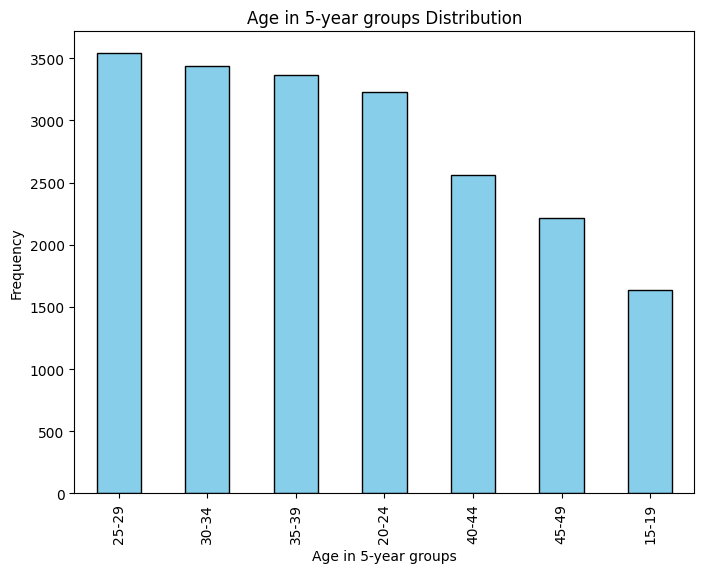

--- Division ---
     Division  Frequency  Percentage  Cumulative Frequency
0       Dhaka       3028   15.149847                  3028
1  Chattogram       2983   14.924701                  6011
2      Khulna       2602   13.018462                  8613
3    Rajshahi       2546   12.738280                 11159
4     Rangpur       2399   12.002802                 13558
5  Mymensingh       2156   10.787012                 15714
6      Sylhet       2156   10.787012                 17870
7    Barishal       2117   10.591885                 19987




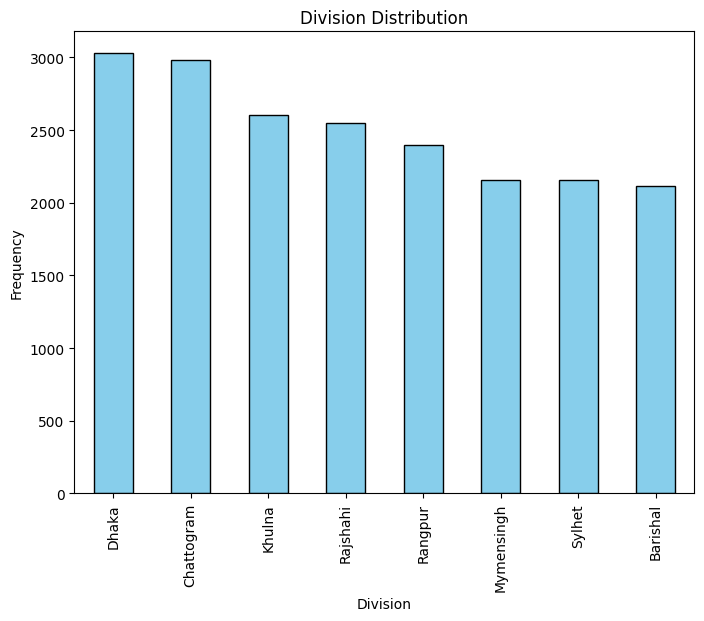

--- Type of place of residence ---
  Type of place of residence  Frequency  Percentage  Cumulative Frequency
0                      Rural      12980   64.942212                 12980
1                      Urban       7007   35.057788                 19987




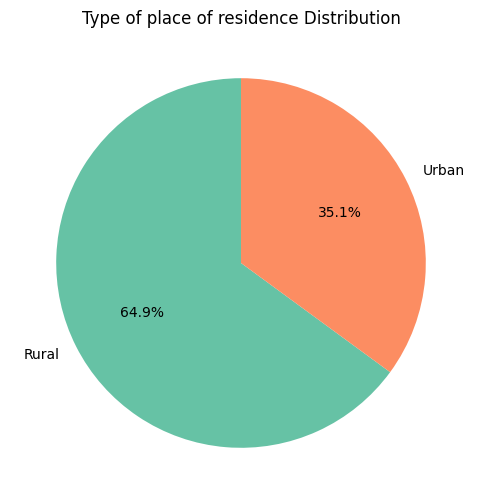

--- Highest educational level ---
  Highest educational level  Frequency  Percentage  Cumulative Frequency
0                 Secondary       9136   45.709711                  9136
1                   Primary       5207   26.051934                 14343
2                    Higher       2923   14.624506                 17266
3              No education       2721   13.613849                 19987




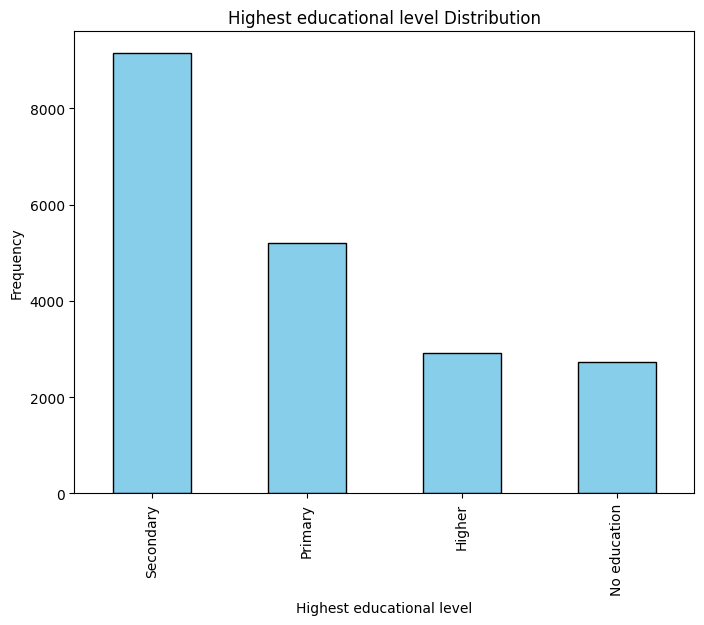

--- Household has: electricity ---
  Household has: electricity  Frequency  Percentage  Cumulative Frequency
0                        Yes      18304   91.579527                 18304
1      Not a dejure resident       1423    7.119628                 19727
2                         No        260    1.300846                 19987




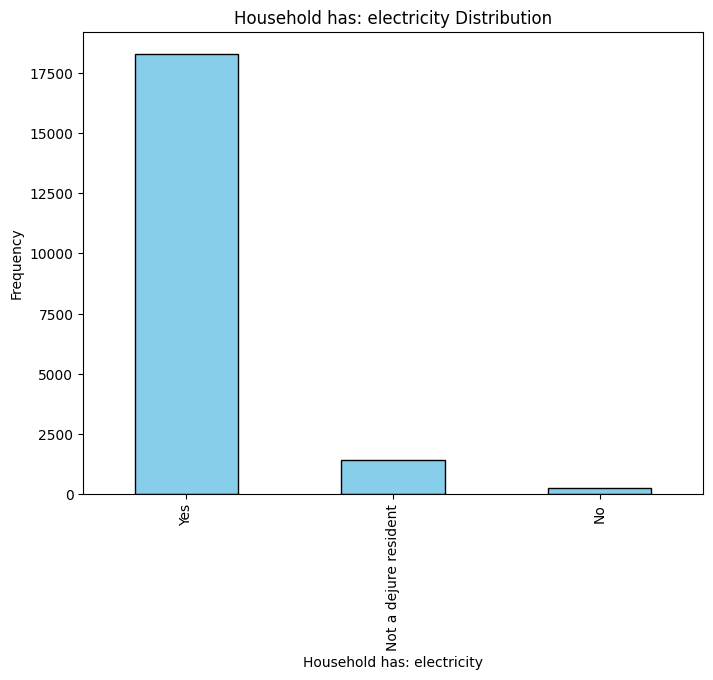

--- Religion ---
       Religion  Frequency  Percentage  Cumulative Frequency
0         Islam      17928   89.698304                 17928
1      Hinduism       1828    9.145945                 19756
2      Buddhist        185    0.925602                 19941
3  Christianity         40    0.200130                 19981
4        Others          6    0.030020                 19987




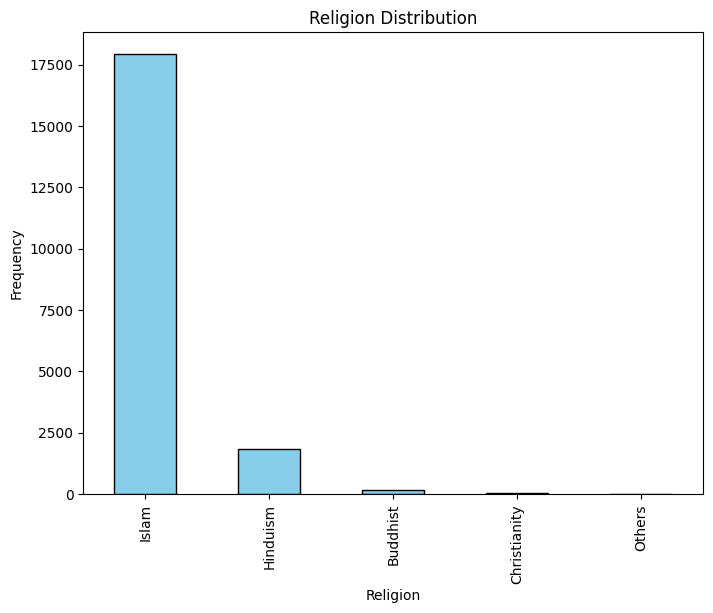

--- Wealth index combined ---
  Wealth index combined  Frequency  Percentage  Cumulative Frequency
0               Richest       4347   21.749137                  4347
1                Richer       4149   20.758493                  8496
2                Middle       3989   19.957973                 12485
3                Poorer       3914   19.582729                 16399
4               Poorest       3588   17.951669                 19987




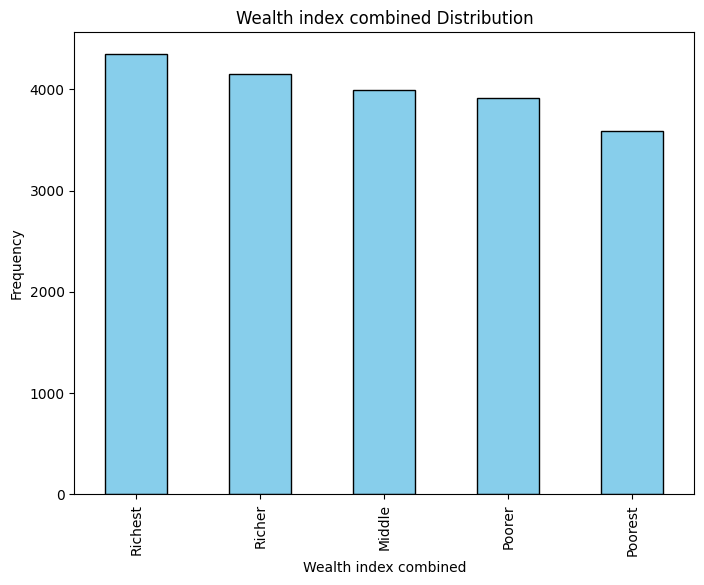

--- Number of living children ---
  Number of living children  Frequency  Percentage  Cumulative Frequency
0                         2       7019   35.117827                  7019
1                        3+       6071   30.374744                 13090
2                         1       4728   23.655376                 17818
3                         0       2169   10.852054                 19987




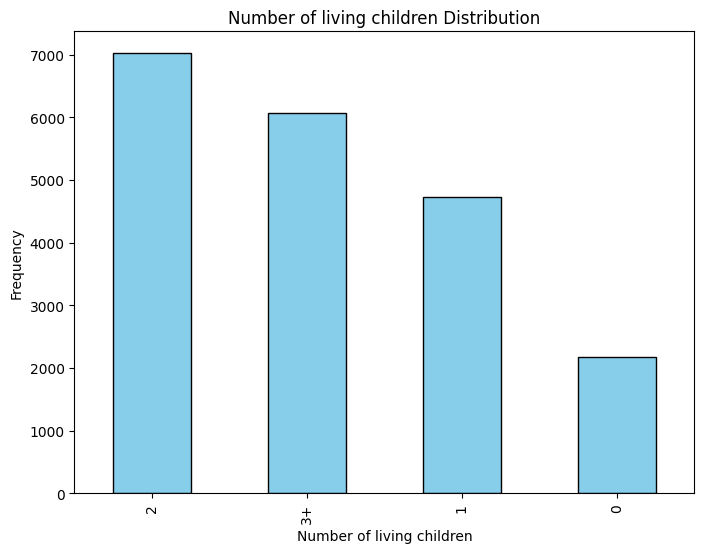

--- Heard family planning on radio last few months ---
  Heard family planning on radio last few months  Frequency  Percentage  Cumulative Frequency
0                                             No      19692   98.524041                 19692
1                                            Yes        295    1.475959                 19987




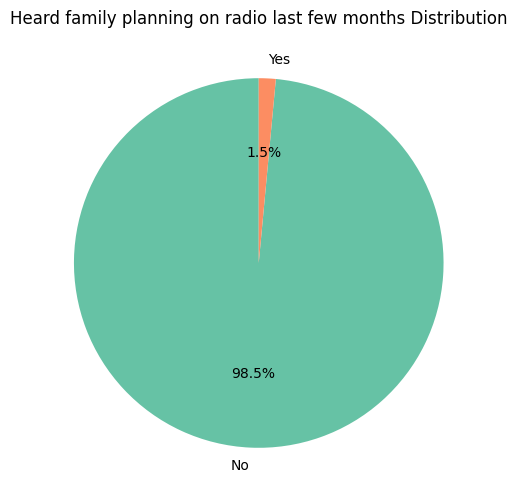

--- Heard family planning on TV last few months ---
  Heard family planning on TV last few months  Frequency  Percentage  Cumulative Frequency
0                                          No      15820   79.151448                 15820
1                                         Yes       4167   20.848552                 19987




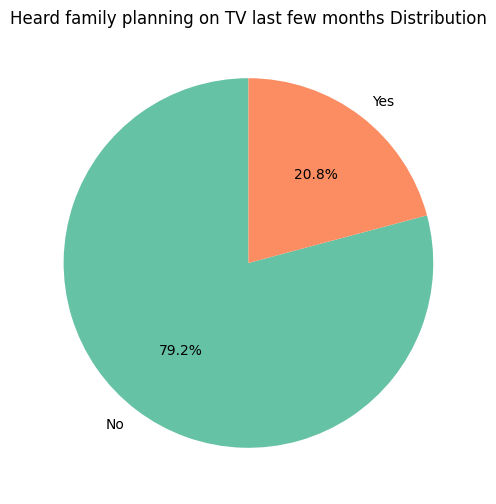

--- Heard family planning in newspaper/magazine last few months ---
  Heard family planning in newspaper/magazine last few months  Frequency  Percentage  Cumulative Frequency
0                                                          No      19316   96.642818                 19316
1                                                         Yes        671    3.357182                 19987




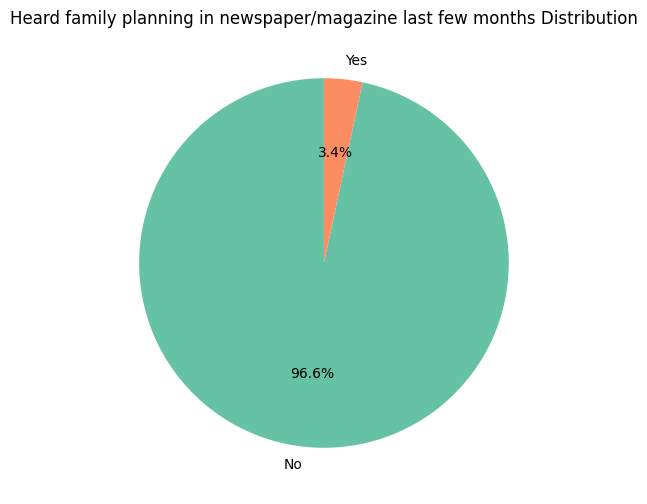

--- Heard family planning by text messages on mobile phone ---
  Heard family planning by text messages on mobile phone  Frequency  Percentage  Cumulative Frequency
0                                                     No      18754    93.83099                 18754
1                                                    Yes       1233     6.16901                 19987




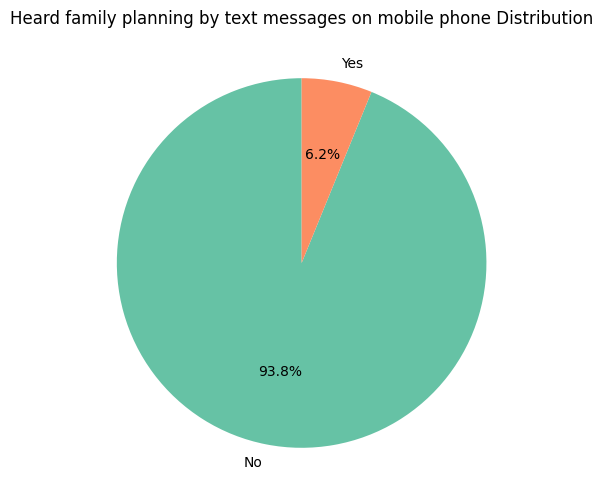

--- Seen about family planning on facebook, twitter, instagram, others ---
  Seen about family planning on facebook, twitter, instagram, others  Frequency  Percentage  Cumulative Frequency
0                                                                 No      18210   91.109221                 18210
1                                                                Yes       1777    8.890779                 19987




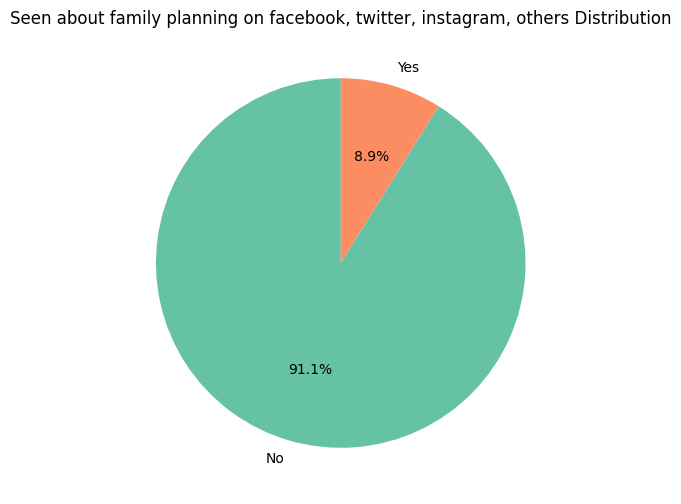

--- Seen about family planning on poster, brochure ---
  Seen about family planning on poster, brochure  Frequency  Percentage  Cumulative Frequency
0                                             No      17332   86.716366                 17332
1                                            Yes       2655   13.283634                 19987




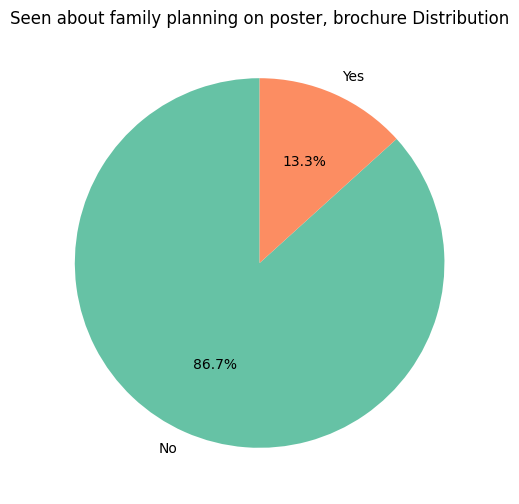

--- Seen about family planning on outdoor sign, billboard ---
  Seen about family planning on outdoor sign, billboard  Frequency  Percentage  Cumulative Frequency
0                                                    No      14639   73.242608                 14639
1                                                   Yes       5348   26.757392                 19987




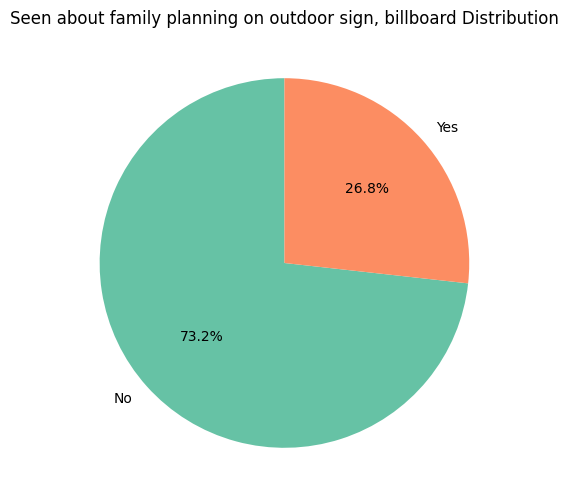

--- Heard family planning at community meetings events ---
  Heard family planning at community meetings events  Frequency  Percentage  Cumulative Frequency
0                                                 No      18823   94.176215                 18823
1                                                Yes       1164    5.823785                 19987




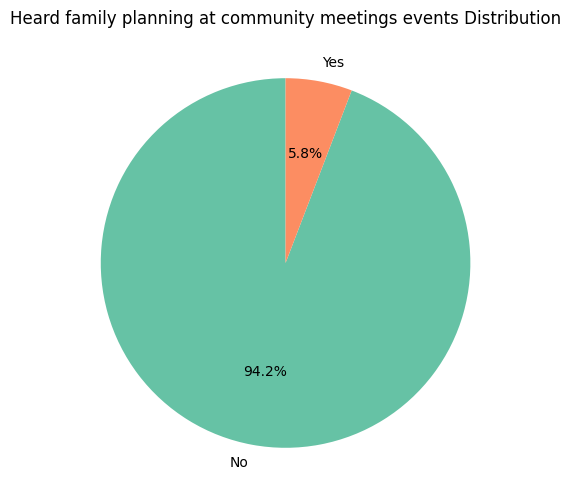

--- Current marital status ---
                Current marital status  Frequency  Percentage  Cumulative Frequency
0                              Married      18987   94.996748                 18987
1                              Widowed        543    2.716766                 19530
2                             Divorced        276    1.380898                 19806
3  No longer living together/separated        181    0.905589                 19987




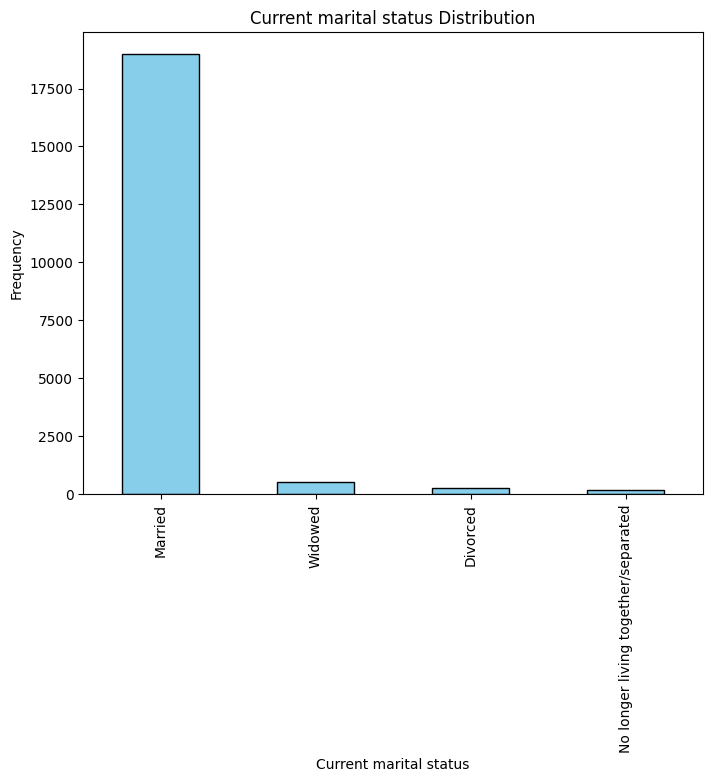

--- Respondent currently working ---
  Respondent currently working  Frequency  Percentage  Cumulative Frequency
0                           No      13812   69.104918                 13812
1                          Yes       6175   30.895082                 19987




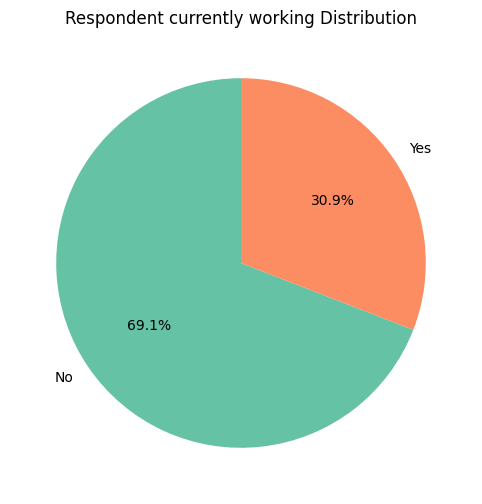

--- Respondent's occupation (grouped) ---
   Respondent's occupation (grouped)  Frequency  Percentage  Cumulative Frequency
0                        Not working      12803   64.056637                 12803
1            Agricultural - employee       3760   18.812228                 16563
2                     Skilled manual       1116    5.583629                 17679
3                           Services        822    4.112673                 18501
4  Professional/technical/managerial        438    2.191424                 18939
5             Household and domestic        431    2.156402                 19370
6                              Sales        232    1.160754                 19602
7       Agricultural - self employed        208    1.040676                 19810
8                   Unskilled manual        176    0.880572                 19986
9                         Don't know          1    0.005003                 19987




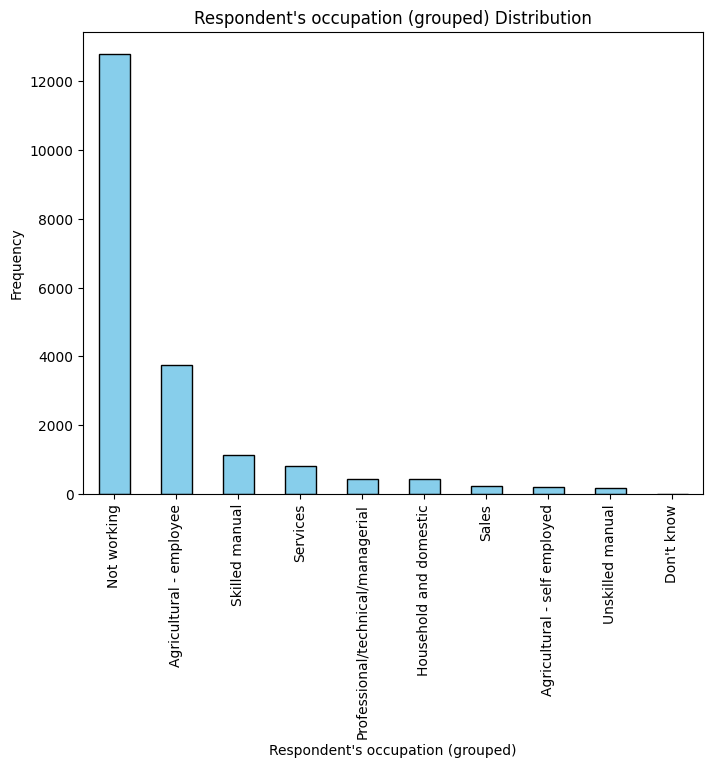

--- Husband/partner's educational attainment ---
  Husband/partner's educational attainment  Frequency  Percentage  Cumulative Frequency
0                             No education       5018   25.106319                  5018
1                     Incomplete secondary       4258   21.303848                  9276
2                                   Higher       3544   17.731525                 12820
3                         Complete primary       2873   14.374343                 15693
4                       Incomplete primary       2539   12.703257                 18232
5                       Complete secondary       1722    8.615600                 19954
6                               Don't know         33    0.165107                 19987




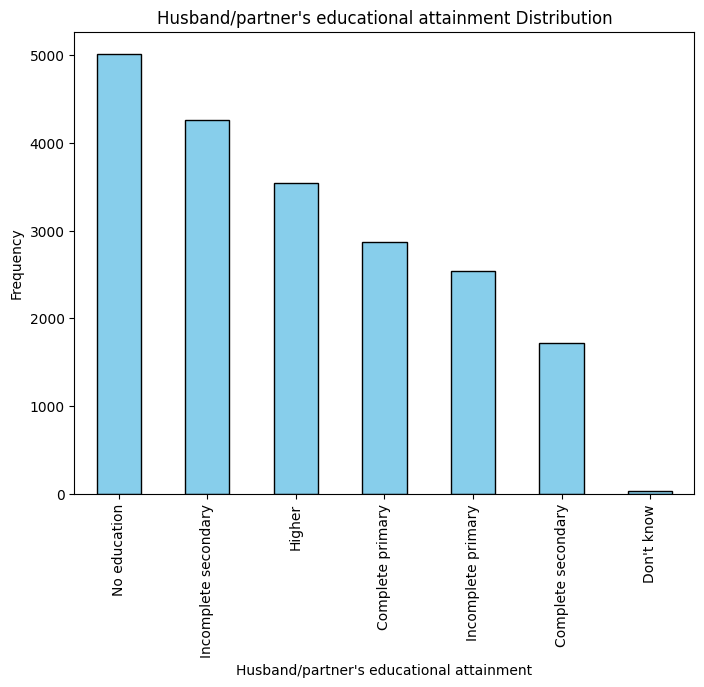

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns in the dataset
categorical_columns = [
    'Age in 5-year groups', 'Division', 'Type of place of residence', 'Highest educational level',
    'Household has: electricity', 'Religion', 'Wealth index combined', 'Number of living children',
    'Heard family planning on radio last few months', 'Heard family planning on TV last few months',
    'Heard family planning in newspaper/magazine last few months', 'Heard family planning by text messages on mobile phone',
    'Seen about family planning on facebook, twitter, instagram, others', 'Seen about family planning on poster, brochure',
    'Seen about family planning on outdoor sign, billboard', 'Heard family planning at community meetings events',
    'Current marital status', 'Respondent currently working', 'Respondent\'s occupation (grouped)',
    'Husband/partner\'s educational attainment'
]

# Univariate analysis for categorical variables
for col in categorical_columns:
    print(f"--- {col} ---")

    # Frequency Distribution Table
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequency']
    freq_table['Percentage'] = (freq_table['Frequency'] / freq_table['Frequency'].sum()) * 100
    freq_table['Cumulative Frequency'] = freq_table['Frequency'].cumsum()

    # Display the frequency distribution table
    print(freq_table)
    print("\n")

    # Plotting the suitable visualization for the categorical variable
    plt.figure(figsize=(8, 6))

    # If the variable has exactly 2 categories (binary), use a pie chart
    if len(df[col].value_counts()) == 2:
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', title=f'{col} Distribution', colors=sns.color_palette("Set2"), startangle=90)
        plt.ylabel('')  # Hide the y-label for a cleaner look

    # If the variable has more than 2 categories, use a bar chart
    elif len(df[col].value_counts()) > 2:
        df[col].value_counts().plot(kind='bar', title=f'{col} Distribution', color='skyblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.show()


### Numerical Variable

--- Husband/partner's age ---
count    19987.000000
mean        39.726286
std         10.439450
min         15.000000
25%         32.000000
50%         39.726286
75%         46.000000
max         95.000000
Name: Husband/partner's age, dtype: float64




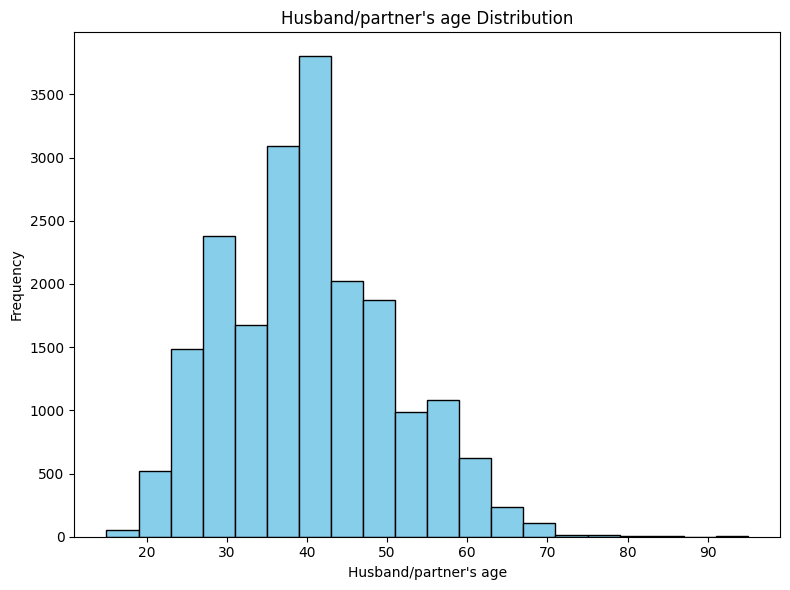

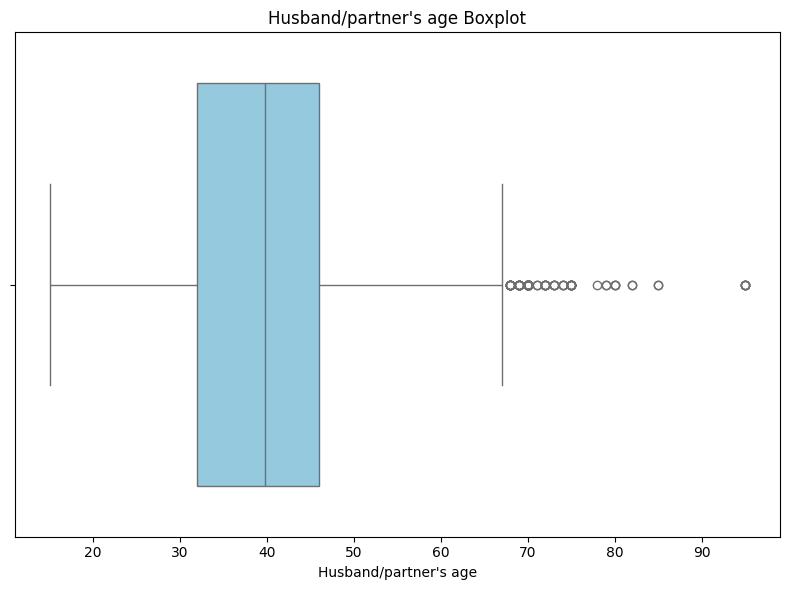

In [55]:
# Numerical columns for analysis
numerical_columns = ['Husband/partner\'s age']

# Univariate analysis for numerical variables
for col in numerical_columns:
    print(f"--- {col} ---")

    # Descriptive statistics
    print(df[col].describe())
    print("\n")

    # Plotting the suitable visualization for the numerical variable
    plt.figure(figsize=(8, 6))  # You can use your preferred size

    # Histogram for numerical variables
    df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', title=f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout for better readability
    plt.show()

    # Boxplot for numerical variables (to visualize spread and detect outliers)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

In [56]:
# Recode Current contraceptive method → Using / Not using

df['contraceptive_use_cat'] = df['Current contraceptive method'].apply(
    lambda x: 'Not using' if x == 'Not using' else 'Using'
)

df['contraceptive_use'] = df['contraceptive_use_cat'].map({
    'Not using': 0,
    'Using': 1
}).astype(int)

In [57]:
from scipy.stats import chi2_contingency, chi2, spearmanr

In [58]:
dependent_variable = 'contraceptive_use'

# Define independent categorical variables by selecting from the original list of categorical columns
# and excluding the dependent variable and the one found to be insignificant in bivariate analysis
independent_categorical_variables = [
    'Age in 5-year groups', 'Division', 'Type of place of residence', 'Highest educational level',
    'Household has: electricity', 'Religion', 'Wealth index combined', 'Number of living children',
    'Heard family planning on radio last few months', 'Heard family planning on TV last few months',
    'Heard family planning in newspaper/magazine last few months','Heard family planning by text messages on mobile phone',
    'Seen about family planning on facebook, twitter, instagram, others', 'Seen about family planning on poster, brochure',
    'Seen about family planning on outdoor sign, billboard', 'Heard family planning at community meetings events',
    'Current marital status', 'Respondent currently working', "Respondent's occupation (grouped)",
    "Husband/partner's educational attainment"
]

In [59]:
for col in independent_categorical_variables:
    print(f"\n--- Detailed Analysis for: {col} ---")

    # 3. Create a contingency table
    contingency_table = pd.crosstab(df[col], df[dependent_variable])

    # 4. Print the contingency table
    print("Contingency Table:")
    print(contingency_table)

    # 5. Perform a chi-square test for independence
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # 6. Extract and print the chi-square statistic, degrees of freedom (df), and p-value
    print(f"\nChi-square Statistic: {chi2_stat:.4f}")
    print(f"Degrees of Freedom (df): {dof}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("The relationship is statistically significant (p < 0.05).")
    else:
        print("The relationship is not statistically significant (p >= 0.05).")



--- Detailed Analysis for: Age in 5-year groups ---
Contingency Table:
contraceptive_use        0     1
Age in 5-year groups            
15-19                  763   872
20-24                 1370  1863
25-29                 1317  2222
30-34                 1107  2331
35-39                  979  2383
40-44                  923  1638
45-49                 1283   936

Chi-square Statistic: 606.1016
Degrees of Freedom (df): 6
P-value: 0.0000
The relationship is statistically significant (p < 0.05).

--- Detailed Analysis for: Division ---
Contingency Table:
contraceptive_use     0     1
Division                     
Barishal            787  1330
Chattogram         1314  1669
Dhaka              1222  1806
Khulna              950  1652
Mymensingh          793  1363
Rajshahi            831  1715
Rangpur             777  1622
Sylhet             1068  1088

Chi-square Statistic: 236.4978
Degrees of Freedom (df): 7
P-value: 0.0000
The relationship is statistically significant (p < 0.05).

--- 

## Summary of Detailed Categorical vs. Categorical Bivariate Analysis

This detailed analysis involved performing chi-square tests for independence between each of the 20 categorical independent variables and the dependent variable, 'contraceptive_use'. For each variable, a contingency table was presented, along with the chi-square statistic, degrees of freedom, and p-value.

### Key Findings:

1.  **Overwhelming Statistical Significance**: A vast majority of the independent categorical variables (19 out of 20) demonstrated a statistically significant relationship with 'contraceptive_use' (p-value < 0.05). This suggests that these factors play a role in predicting or being associated with contraceptive usage.

2.  **Highly Significant Variables (p-value ≈ 0.0000)**:
    *   **Number of living children**: Exhibited the highest chi-square statistic (1635.6357) and a p-value of 0.0000, indicating a very strong association with contraceptive use. The contingency table shows clear differences in contraceptive use across different numbers of living children.
    *   **Current marital status**: Also showed a very high chi-square statistic (1664.9335) and p-value of 0.0000. The contingency table reveals that 'Divorced', 'No longer living together/separated', and 'Widowed' categories have 0 instances of 'Using' contraception, which strongly drives this significance.
    *   **Age in 5-year groups**: With a chi-square statistic of 606.1016 and p-value of 0.0000, age is a highly significant factor. Contraceptive use appears to peak in the 30-34 and 35-39 age groups.
    *   **Division**: Showed a significant association (chi-square = 236.4978, p-value = 0.0000), indicating regional differences in contraceptive use.
    *   **Respondent's occupation (grouped)**: With a chi-square of 137.8298 and p-value of 0.0000, different occupational groups have varying patterns of contraceptive use.
    *   **Husband/partner's educational attainment**: Had a chi-square of 102.1647 and p-value of 0.0000, suggesting that the husband/partner's education level is strongly associated with contraceptive use.
    *   **Household has: electricity**: A chi-square of 104.2411 and p-value of 0.0000 indicates a strong link between access to electricity and contraceptive use.
    *   **Respondent currently working**: Displayed a chi-square of 90.8993 and p-value of 0.0000, implying a significant difference in contraceptive use between working and non-working respondents.
    *   **Heard family planning on TV last few months**: A chi-square of 66.1799 and p-value of 0.0000 highlights the significant role of TV in family planning awareness and adoption.
    *   **Highest educational level**: With a chi-square of 70.6794 and p-value of 0.0000, education levels are strongly associated with contraceptive use.
    *   **Religion**: Showed a chi-square of 66.8775 and p-value of 0.0000, suggesting religious affiliation is also a significant factor.
    *   **Heard family planning at community meetings events**: With a chi-square of 35.7059 and p-value of 0.0000, participation in community events related to family planning is significantly associated with contraceptive use.

3.  **Significant Variables (p-value < 0.05 but not ≈ 0)**:
    *   **Type of place of residence**: (chi-square = 23.6098, p-value = 0.0000). While statistically significant, it's lower than the top variables.
    *   **Wealth index combined**: (chi-square = 26.5401, p-value = 0.0000).
    *   **Seen about family planning on outdoor sign, billboard**: (chi-square = 11.4258, p-value = 0.0007).
    *   **Seen about family planning on facebook, twitter, instagram, others**: (chi-square = 11.0562, p-value = 0.0009).
    *   **Seen about family planning on poster, brochure**: (chi-square = 10.5492, p-value = 0.0012).
    *   **Heard family planning on radio last few months**: (chi-square = 6.2538, p-value = 0.0124).
    *   **Heard family planning in newspaper/magazine last few months**: (chi-square = 4.5334, p-value = 0.0332). These variables, though significant, have relatively higher p-values compared to the most influential factors, suggesting a weaker but still present association.

4.  **Not Statistically Significant Relationship (p-value >= 0.05)**:
    *   **Heard family planning by text messages on mobile phone**: This was the *only* variable with a p-value (0.2028) greater than the 0.05 significance level (chi-square = 1.6223). This indicates that, based on this dataset, there is no statistically significant association between hearing about family planning via text messages and contraceptive use. The proportions of 'Not using' vs 'Using' in the contingency table are very similar for both 'No' and 'Yes' categories in this variable.

## Summary:

### Data Analysis Key Findings
*   A vast majority (19 out of 20) of the independent categorical variables demonstrated a statistically significant relationship with 'contraceptive\_use' (p-value < 0.05).
*   Variables showing the strongest association with 'contraceptive\_use' (indicated by high chi-square statistics and p-values of 0.0000) include:
    *   **Current marital status** (Chi-square: 1664.9335)
    *   **Number of living children** (Chi-square: 1635.6357)
    *   **Age in 5-year groups** (Chi-square: 606.1016)
    *   **Division** (Chi-square: 236.4978)
    *   **Respondent's occupation (grouped)** (Chi-square: 137.8298)
    *   **Household has: electricity** (Chi-square: 104.2411)
    *   **Husband/partner's educational attainment** (Chi-square: 102.1647)
*   The only variable that did **not** show a statistically significant relationship with 'contraceptive\_use' was **"Heard family planning by text messages on mobile phone"** (p-value = 0.2028, Chi-square = 1.6223).

### Insights or Next Steps
*   The strong statistical significance of most demographic, socio-economic, and awareness-related factors suggests that a comprehensive approach considering multiple dimensions is necessary for understanding and promoting contraceptive use. These highly significant variables should be prioritized in predictive models or intervention strategies.
*   The lack of a significant association between hearing about family planning via text messages and contraceptive use indicates that this specific communication channel might not be as effective as others, or its impact requires further nuanced investigation beyond simple association.


# Binary Logistic and Machine Learning


=== DEMOGRAPHIC FACTORS ===
                                                          Variable  Estimate (β)  Std. Error    z-value       p-value    Exp(β)  Lower 95% CI (Exp(β))  Upper 95% CI (Exp(β))
const                                                        const      0.985336    0.185054   5.324586  1.011834e-07  2.678713               1.863837               3.849856
Age in 5-year groups_20-24              Age in 5-year groups_20-24      0.207835    0.061422   3.383730  7.150834e-04  1.231010               1.091388               1.388494
Age in 5-year groups_25-29              Age in 5-year groups_25-29      0.416273    0.061236   6.797803  1.062267e-11  1.516299               1.344809               1.709659
Age in 5-year groups_30-34              Age in 5-year groups_30-34      0.620921    0.062089  10.000481  1.516589e-23  1.860640               1.647449               2.101419
Age in 5-year groups_35-39              Age in 5-year groups_35-39      0.765613    0.063012  12.1502

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



=== SOCIO-ECONOMIC FACTORS ===
                                                                                                                                Variable  Estimate (β)  Std. Error    z-value       p-value        Exp(β)  Lower 95% CI (Exp(β))  Upper 95% CI (Exp(β))
const                                                                                                                              const      0.455403    0.178722   2.548108  1.083091e-02  1.576808e+00           1.110837e+00           2.238243e+00
Husband/partner's age                                                                                              Husband/partner's age      0.001781    0.001632   1.091289  2.751456e-01  1.001783e+00           9.985831e-01           1.004993e+00
Highest educational level_No education                                                            Highest educational level_No education      0.050889    0.073024   0.696877  4.858795e-01  1.052206e+00           9.118901e-01

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



=== FINAL INTEGRATED LOGISTIC REGRESSION MODEL ===
                                                                                                                                      Variable  Estimate (β)  Std. Error    z-value        p-value        Exp(β)  Lower 95% CI (Exp(β))  Upper 95% CI (Exp(β))
const                                                                                                                                    const      0.427501    0.261316   1.635953   1.018494e-01  1.533421e+00           9.188161e-01           2.559140e+00
Husband/partner's age                                                                                                    Husband/partner's age      0.000065    0.002805   0.023156   9.815258e-01  1.000065e+00           9.945814e-01           1.005579e+00
Age in 5-year groups_20-24                                                                                          Age in 5-year groups_20-24     -0.716266    0.077546  -9.236619   2

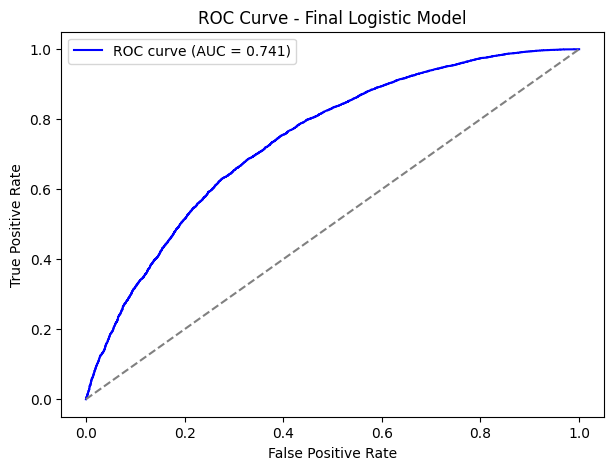


=== RANDOM FOREST RESULTS ===
Accuracy: 0.6998499249624812
ROC-AUC: 0.7403576483832752

Confusion Matrix:
 [[ 755 1537]
 [ 263 3442]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.33      0.46      2292
           1       0.69      0.93      0.79      3705

    accuracy                           0.70      5997
   macro avg       0.72      0.63      0.62      5997
weighted avg       0.71      0.70      0.66      5997



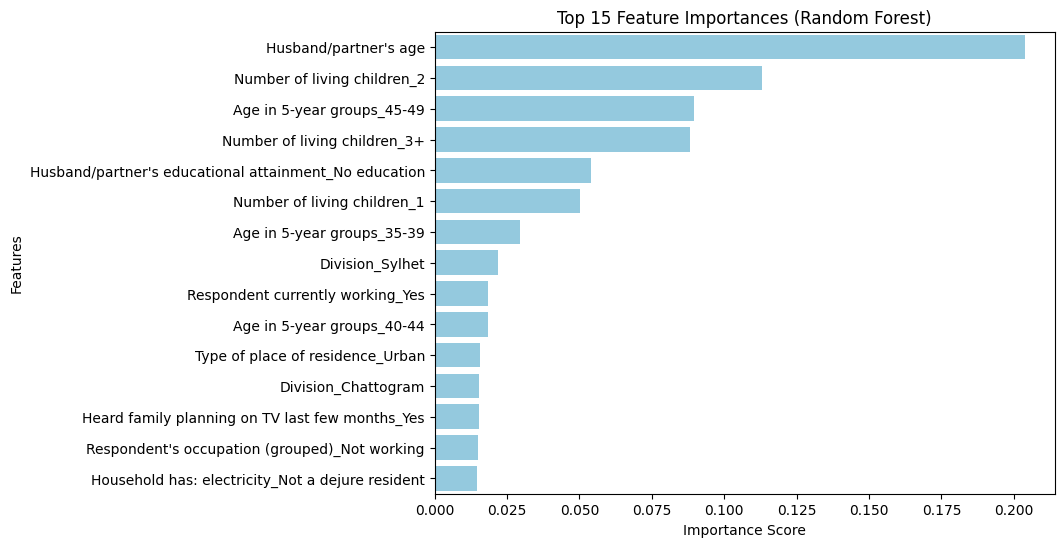


=== XGBOOST RESULTS ===
Accuracy: 0.7191929297982325
ROC-AUC: 0.750609819285763


In [60]:
# =====================================================
# FINAL ANALYSIS PIPELINE: BDHS 2022 FAMILY PLANNING
# =====================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Helper Function: Logistic Regression Runner
# =====================================================
def run_logistic_regression(df, dependent_var, independent_vars):
    """
    Fits a logistic regression model using statsmodels.
    Returns coefficient table and fitted model.
    """
    X = pd.get_dummies(df[independent_vars], drop_first=True)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    y = df[dependent_var].astype(int)

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit the model using robust covariance to handle heteroskedasticity
    model = sm.Logit(y, X).fit(disp=False, cov_type='HC3')

    # Create a detailed results DataFrame
    results = pd.DataFrame({
        'Variable': model.params.index,
        'Estimate (β)': model.params.values,
        'Std. Error': model.bse.values,
        'z-value': model.tvalues.values,
        'p-value': model.pvalues.values,
        'Exp(β)': np.exp(model.params.values),
        'Lower 95% CI (Exp(β))': np.exp(model.conf_int()[0]),
        'Upper 95% CI (Exp(β))': np.exp(model.conf_int()[1])
    })

    return results, model

# =====================================================
# Helper Function: Model Fit Summary
# =====================================================
def model_fit_summary(model):
    print(f"Log-Likelihood: {model.llf:.3f}")
    print(f"Pseudo R²: {model.prsquared:.3f}")
    print(f"AIC: {model.aic:.3f}")

# =====================================================
# STEP 1: DOMAIN-SPECIFIC MODELS
# =====================================================

# --- DEMOGRAPHIC FACTORS (marital status dropped) ---
demographic_vars = [
    'Age in 5-year groups', 'Division', 'Type of place of residence',
    'Religion'
]
demo_results, demo_model = run_logistic_regression(df, 'contraceptive_use', demographic_vars)
print("\n=== DEMOGRAPHIC FACTORS ===")
print(demo_results)
model_fit_summary(demo_model)

# --- SOCIO-ECONOMIC FACTORS ---
socio_vars = [
    'Highest educational level', 'Household has: electricity', 'Wealth index combined',
    'Respondent currently working', "Respondent's occupation (grouped)",
    "Husband/partner's educational attainment", 'Husband/partner\'s age'
]
socio_results, socio_model = run_logistic_regression(df, 'contraceptive_use', socio_vars)
print("\n=== SOCIO-ECONOMIC FACTORS ===")
print(socio_results)
model_fit_summary(socio_model)

# --- REPRODUCTIVE / FAMILY COMPOSITION FACTORS ---
reproductive_vars = ['Number of living children']
repro_results, repro_model = run_logistic_regression(df, 'contraceptive_use', reproductive_vars)
print("\n=== REPRODUCTIVE / FAMILY COMPOSITION FACTORS ===")
print(repro_results)
model_fit_summary(repro_model)

# --- MEDIA EXPOSURE & FAMILY PLANNING INFORMATION (insignificant variables dropped) ---
media_vars = [
    'Heard family planning on radio last few months',
    'Heard family planning on TV last few months',
    'Heard family planning in newspaper/magazine last few months',
    'Seen about family planning on poster, brochure',
    'Seen about family planning on facebook, twitter, instagram, others',
    'Seen about family planning on outdoor sign, billboard',
    'Heard family planning at community meetings events'
]

media_results, media_model = run_logistic_regression(df, 'contraceptive_use', media_vars)
print("\n=== MEDIA EXPOSURE FACTORS ===")
print(media_results)
model_fit_summary(media_model)

# =====================================================
# STEP 2: INTEGRATED LOGISTIC MODEL
# =====================================================
all_vars = (
    demographic_vars
    + socio_vars
    + reproductive_vars
    + media_vars
)

final_results, final_model = run_logistic_regression(df, 'contraceptive_use', all_vars)
print("\n=== FINAL INTEGRATED LOGISTIC REGRESSION MODEL ===")
print(final_results)
model_fit_summary(final_model)

# --- ROC Curve for Final Model ---
X_all = pd.get_dummies(df[all_vars], drop_first=True)
X_all = X_all.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
X_all = sm.add_constant(X_all)
y_all = df['contraceptive_use']

y_pred_prob = final_model.predict(X_all)
fpr, tpr, _ = roc_curve(y_all, y_pred_prob)
auc_score = roc_auc_score(y_all, y_pred_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.title('ROC Curve - Final Logistic Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# =====================================================
# STEP 3: MACHINE LEARNING MODELS (Validation)
# =====================================================

# Train/Test Split
X_ml = pd.get_dummies(df[all_vars], drop_first=True)
X_ml = X_ml.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
y_ml = df['contraceptive_use']

X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.3, random_state=42)

# --- RANDOM FOREST ---
rf_model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=8)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== RANDOM FOREST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# --- Feature Importance ---
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values, y=importances.index, color='skyblue')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# --- XGBOOST MODEL ---
xgb_model = XGBClassifier(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n=== XGBOOST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))


In [61]:
from sklearn.metrics import roc_auc_score

# Compute AUCs for each domain model
for name, model, vars in [
    ("Demographic", demo_model, demographic_vars),
    ("Socio-Economic", socio_model, socio_vars),
    ("Reproductive", repro_model, reproductive_vars),
    ("Media Exposure", media_model, media_vars)
]:
    X_sub = pd.get_dummies(df[vars], drop_first=True)
    X_sub = X_sub.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X_sub = sm.add_constant(X_sub)
    y_sub = df['contraceptive_use']
    auc = roc_auc_score(y_sub, model.predict(X_sub))
    print(f"{name} Model AUC: {auc:.3f}")


Demographic Model AUC: 0.627
Socio-Economic Model AUC: 0.600
Reproductive Model AUC: 0.631
Media Exposure Model AUC: 0.540


In [62]:
from sklearn.metrics import log_loss

# --- RANDOM FOREST METRICS ---
rf_probs = rf_model.predict_proba(X_test)[:,1]
rf_logloss = log_loss(y_test, rf_probs)

print("\n=== RANDOM FOREST DETAILED METRICS ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_probs):.3f}")
print(f"Log Loss: {rf_logloss:.3f}")
print(f"Pseudo R² Equivalent (1 - LogLoss/NullLoss): {1 - rf_logloss / np.log(2):.3f}")  # rough pseudo-R² comparison

# --- XGBOOST METRICS ---
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
xgb_logloss = log_loss(y_test, xgb_probs)

print("\n=== XGBOOST DETAILED METRICS ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_probs):.3f}")
print(f"Log Loss: {xgb_logloss:.3f}")
print(f"Pseudo R² Equivalent (1 - LogLoss/NullLoss): {1 - xgb_logloss / np.log(2):.3f}")



=== RANDOM FOREST DETAILED METRICS ===
Accuracy: 0.700
ROC-AUC: 0.740
Log Loss: 0.591
Pseudo R² Equivalent (1 - LogLoss/NullLoss): 0.148

=== XGBOOST DETAILED METRICS ===
Accuracy: 0.719
ROC-AUC: 0.751
Log Loss: 0.552
Pseudo R² Equivalent (1 - LogLoss/NullLoss): 0.203


In [63]:
from sklearn.metrics import accuracy_score

def logistic_accuracy(model, df, independent_vars, dependent_var='contraceptive_use'):
    X = pd.get_dummies(df[independent_vars], drop_first=True)
    # Apply the same robust numerical conversion as in run_logistic_regression
    X = X.apply(pd.to_numeric, errors='coerce')
    if X.isnull().any().any():
        print(f"Warning: NaNs found in X after pd.to_numeric for logistic_accuracy. Filling with 0.")
        X = X.fillna(0)
    X = X.astype(float)
    X = sm.add_constant(X)
    y = df[dependent_var]
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return accuracy_score(y, y_pred)

# Calculate accuracies
demo_acc = logistic_accuracy(demo_model, df, demographic_vars)
socio_acc = logistic_accuracy(socio_model, df, socio_vars)
repro_acc = logistic_accuracy(repro_model, df, reproductive_vars)
media_acc = logistic_accuracy(media_model, df, media_vars)
final_acc = logistic_accuracy(final_model, df, all_vars)

print("Demographic Accuracy:", round(demo_acc,3))
print("Socio-Economic Accuracy:", round(socio_acc,3))
print("Reproductive Accuracy:", round(repro_acc,3))
print("Media Exposure Accuracy:", round(media_acc,3))
print("Integrated Logistic Accuracy:", round(final_acc,3))

Demographic Accuracy: 0.635
Socio-Economic Accuracy: 0.625
Reproductive Accuracy: 0.667
Media Exposure Accuracy: 0.613
Integrated Logistic Accuracy: 0.703


In [64]:
n_rf = len(y_test)
k_rf = X_test.shape[1]
rf_loglik = -n_rf * rf_logloss
rf_aic = 2*k_rf - 2*rf_loglik

n_xgb = len(y_test)
k_xgb = X_test.shape[1]
xgb_loglik = -n_xgb * xgb_logloss
xgb_aic = 2*k_xgb - 2*xgb_loglik

print(f"Random Forest Log-Likelihood: {rf_loglik:.2f}, AIC: {rf_aic:.2f}")
print(f"XGBoost Log-Likelihood: {xgb_loglik:.2f}, AIC: {xgb_aic:.2f}")


Random Forest Log-Likelihood: -3542.36, AIC: 7192.72
XGBoost Log-Likelihood: -3313.14, AIC: 6734.27


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df, vars_list):
    X = pd.get_dummies(df[vars_list], drop_first=True)
    # Ensure all columns are numeric, converting non-numeric to NaN and then filling NaN with 0
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]

vif_results = compute_vif(df, all_vars)
print("\n=== VARIANCE INFLATION FACTORS (VIF) ===")
print(vif_results.sort_values("VIF", ascending=False).head(15))


=== VARIANCE INFLATION FACTORS (VIF) ===
                                            Variable        VIF
18                                    Religion_Islam  13.035314
17                                 Religion_Hinduism  12.428839
24                    Household has: electricity_Yes   7.598581
23  Household has: electricity_Not a dejure resident   7.458796
33     Respondent's occupation (grouped)_Not working   5.732694
7                         Age in 5-year groups_45-49   5.464623
6                         Age in 5-year groups_40-44   5.186700
5                         Age in 5-year groups_35-39   5.133435
29                  Respondent currently working_Yes   5.003315
4                         Age in 5-year groups_30-34   4.363527
47                      Number of living children_3+   4.346206
46                       Number of living children_2   3.902084
21                 Highest educational level_Primary   3.779112
3                         Age in 5-year groups_25-29   3.70789

In [66]:
mfx = final_model.get_margeff(at='overall', method='dydx')
mfx_summary = mfx.summary_frame()
print("\n=== AVERAGE MARGINAL EFFECTS (AMEs) ===")
# Print the entire DataFrame to inspect its contents and available columns
print(mfx_summary.head(20))


=== AVERAGE MARGINAL EFFECTS (AMEs) ===
                                           dy/dx  Std. Err.          z       Pr(>|z|)  Conf. Int. Low  Cont. Int. Hi.
Husband/partner's age                   0.000013   0.000546   0.023156   9.815258e-01       -0.001058        0.001083
Age in 5-year groups_20-24             -0.139416   0.015000  -9.294380   1.480670e-20       -0.168815       -0.110016
Age in 5-year groups_25-29             -0.233448   0.016328 -14.297481   2.268735e-46       -0.265450       -0.201446
Age in 5-year groups_30-34             -0.259606   0.017768 -14.611225   2.381977e-48       -0.294430       -0.224782
Age in 5-year groups_35-39             -0.253332   0.019351 -13.091130   3.700611e-39       -0.291260       -0.215404
Age in 5-year groups_40-44             -0.333003   0.021384 -15.572363   1.121842e-54       -0.374915       -0.291091
Age in 5-year groups_45-49             -0.523773   0.022676 -23.097828  4.868639e-118       -0.568218       -0.479329
Division_Chatto

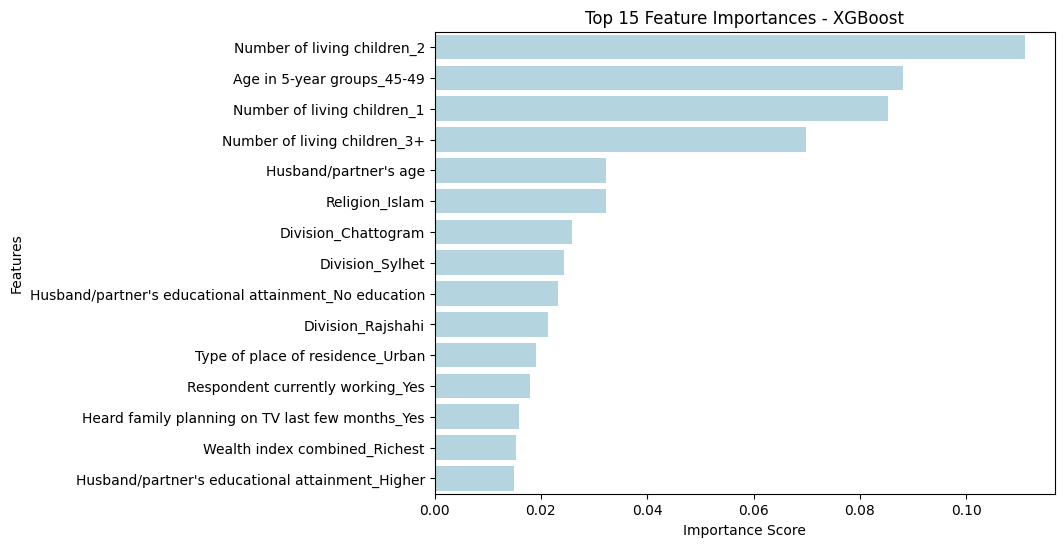

In [67]:
xgb_importances = pd.Series(
    xgb_model.feature_importances_, index=X_train.columns
).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index, color='lightblue')
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(cv_model, X_ml, y_ml, cv=5, scoring='roc_auc')

print("\n=== CROSS-VALIDATION RESULTS ===")
print(f"AUC Scores per fold: {np.round(scores,3)}")
print(f"Mean AUC: {np.mean(scores):.3f}, Std: {np.std(scores):.3f}")



=== CROSS-VALIDATION RESULTS ===
AUC Scores per fold: [0.721 0.575 0.634 0.709 0.672]
Mean AUC: 0.662, Std: 0.053



=== VARIABLE EXCLUSION SENSITIVITY ===


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Without Demographics → AUC: 0.703, Log-Likelihood: -11971.02, AIC: 24016.05
Without Socio-Economic → AUC: 0.728, Log-Likelihood: -11652.33, AIC: 23362.67


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Without Reproductive → AUC: 0.661, Log-Likelihood: -12563.62, AIC: 25231.24


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Without Media → AUC: 0.739, Log-Likelihood: -11483.05, AIC: 23062.10

=== THRESHOLD SENSITIVITY ===
   Threshold  Accuracy  Sensitivity  Specificity
0        0.1  0.626707     0.999102     0.037716
1        0.2  0.651924     0.991997     0.114053
2        0.3  0.676290     0.970355     0.211186
3        0.4  0.697553     0.924622     0.338414
4        0.5  0.702957     0.852593     0.466288
5        0.6  0.692650     0.742507     0.613795
6        0.7  0.642267     0.559167     0.773702
7        0.8  0.521739     0.267619     0.923663


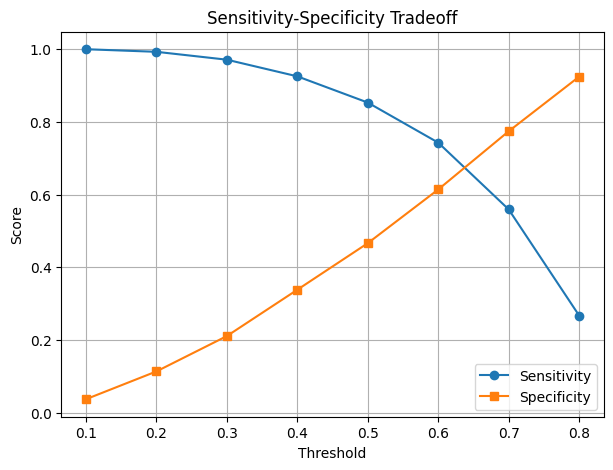


=== BOOTSTRAP ROBUSTNESS (50 resamples) ===
Mean AUC: 0.863, Std Dev: 0.004


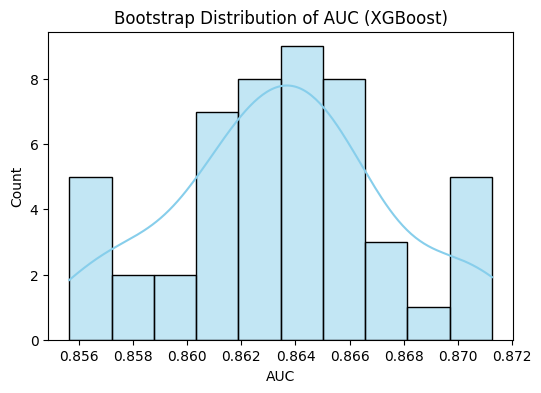


=== MULTICOLLINEARITY SENSITIVITY ===
Variables with VIF > 10: ['const', 'Religion_Hinduism', 'Religion_Islam']


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Reduced Model AUC: 0.736

=== MODEL TYPE SENSITIVITY ===
Logistic Regression AUC: 0.731
XGBoost AUC: 0.751

Sensitivity analysis complete.


In [69]:
# ============================================================
# SENSITIVITY ANALYSIS – BDHS 2022 CONTRACEPTIVE USE STUDY
# ============================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ============================================================
# PREPARATION
# ============================================================

dependent_var = 'contraceptive_use'
all_vars = (
    demographic_vars + socio_vars + reproductive_vars + media_vars
)

X_full = pd.get_dummies(df[all_vars], drop_first=True)
X_full = X_full.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
y_full = df[dependent_var].astype(int)
X_full_const = sm.add_constant(X_full)

# ============================================================
# 1️⃣ VARIABLE EXCLUSION SENSITIVITY
# ============================================================

print("\n=== VARIABLE EXCLUSION SENSITIVITY ===")

groups = {
    "Without Demographics": socio_vars + reproductive_vars + media_vars,
    "Without Socio-Economic": demographic_vars + reproductive_vars + media_vars,
    "Without Reproductive": demographic_vars + socio_vars + media_vars,
    "Without Media": demographic_vars + socio_vars + reproductive_vars
}

for label, vars_list in groups.items():
    X_temp = pd.get_dummies(df[vars_list], drop_first=True)
    X_temp = X_temp.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    X_temp_const = sm.add_constant(X_temp)
    model = sm.Logit(y_full, X_temp_const).fit(disp=False)
    auc = roc_auc_score(y_full, model.predict(X_temp_const))
    print(f"{label} → AUC: {auc:.3f}, Log-Likelihood: {model.llf:.2f}, AIC: {model.aic:.2f}")

# ============================================================
# 2️⃣ THRESHOLD SENSITIVITY (Classification Cutoff)
# ============================================================

print("\n=== THRESHOLD SENSITIVITY ===")

final_probs = final_model.predict(X_full_const)
thresholds = np.arange(0.1, 0.9, 0.1)

results = []
for t in thresholds:
    y_pred = (final_probs >= t).astype(int)
    sens = recall_score(y_full, y_pred)  # Sensitivity (Recall)
    spec = (sum((y_pred == 0) & (y_full == 0)) / sum(y_full == 0))  # Specificity
    acc = accuracy_score(y_full, y_pred)
    results.append([t, acc, sens, spec])

sensitivity_df = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])
print(sensitivity_df)

plt.figure(figsize=(7,5))
plt.plot(sensitivity_df['Threshold'], sensitivity_df['Sensitivity'], label='Sensitivity', marker='o')
plt.plot(sensitivity_df['Threshold'], sensitivity_df['Specificity'], label='Specificity', marker='s')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity-Specificity Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 3️⃣ SAMPLING ROBUSTNESS (Bootstrapping)
# ============================================================

print("\n=== BOOTSTRAP ROBUSTNESS (50 resamples) ===")

boot_auc = []
for i in range(50):
    X_res, y_res = resample(X_full, y_full, random_state=i)
    model = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=6)
    model.fit(X_res, y_res)
    auc = roc_auc_score(y_res, model.predict_proba(X_res)[:,1])
    boot_auc.append(auc)

print(f"Mean AUC: {np.mean(boot_auc):.3f}, Std Dev: {np.std(boot_auc):.3f}")

plt.figure(figsize=(6,4))
sns.histplot(boot_auc, bins=10, kde=True, color='skyblue')
plt.title('Bootstrap Distribution of AUC (XGBoost)')
plt.xlabel('AUC')
plt.show()

# ============================================================
# 4️⃣ MULTICOLLINEARITY SENSITIVITY (VIF Adjustment)
# ============================================================

print("\n=== MULTICOLLINEARITY SENSITIVITY ===")

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_full_const.copy()
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
high_vif = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()

print("Variables with VIF > 10:", high_vif)

# Drop high-VIF variables and recheck
if high_vif:
    X_reduced = X_vif.drop(columns=high_vif, errors='ignore')
    reduced_model = sm.Logit(y_full, X_reduced).fit(disp=False)
    print(f"Reduced Model AUC: {roc_auc_score(y_full, reduced_model.predict(X_reduced)):.3f}")
else:
    print("No variables exceed VIF threshold.")

# ============================================================
# 5️⃣ MODEL TYPE SENSITIVITY (Compare LR, RF, XGB)
# ============================================================

print("\n=== MODEL TYPE SENSITIVITY ===")

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Logistic Regression
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
auc_lr = roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])

# Random Forest
rf = XGBClassifier(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=6)
rf.fit(X_train, y_train)
auc_xgb = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print(f"Logistic Regression AUC: {auc_lr:.3f}")
print(f"XGBoost AUC: {auc_xgb:.3f}")

# ============================================================
# END OF ANALYSIS
# ============================================================
print("\nSensitivity analysis complete.")


In [70]:
from sklearn.metrics import confusion_matrix

# Predict probabilities and classify at 0.5 threshold
y_pred_prob = final_model.predict(X_full_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_full, y_pred).ravel()

# Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


Sensitivity (Recall): 0.853
Specificity: 0.466


In [71]:
from sklearn.metrics import roc_curve, confusion_matrix
import numpy as np

# Predicted probabilities from your final model
y_pred_prob = final_model.predict(X_all)
y_true = df['contraceptive_use']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

# Compute Sensitivity and Specificity at this optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_optimal).ravel()

sensitivity_opt = tp / (tp + fn)
specificity_opt = tn / (tn + fp)

print(f"Optimal Threshold (Youden's J): {optimal_threshold:.3f}")
print(f"Sensitivity at Optimal: {sensitivity_opt:.3f}")
print(f"Specificity at Optimal: {specificity_opt:.3f}")


Optimal Threshold (Youden's J): 0.635
Sensitivity at Optimal: 0.687
Specificity at Optimal: 0.671
